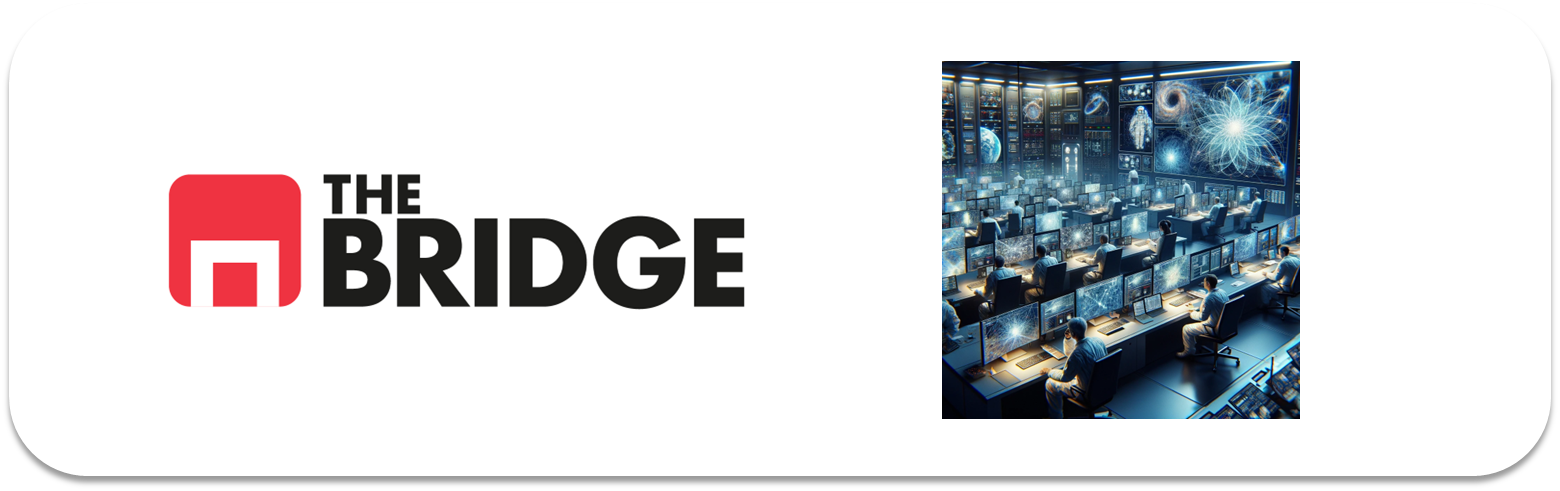

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import tensorflow as tf


from tensorflow.keras import layers, models, callbacks

import warnings

warnings.filterwarnings('ignore')


### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [25]:
def load(directory):
    X = []
    y = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            label = 1 if "dog" in filename.lower() else 0  
            image = Image.open(filepath).convert("RGB").resize((32, 32))
            X.append(np.array(image))
            y.append(label)
    return np.array(X), np.array(y)


In [27]:

train_dirs = ["./data/github_train_0", "./data/github_train_1", "./data/github_train_2", "./data/github_train_3"]
test_dir = "./data/github_test"

In [29]:
X_train = []
y_train = []

for d in train_dirs:
    X_temp, y_temp = load(d)
    X_train.extend(X_temp)
    y_train.extend(y_temp)

X_test, y_test = load(test_dir)

In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_test.shape

(1000, 32, 32, 3)

In [32]:
X_train.shape

(4000, 32, 32, 3)

In [33]:
X_train, X_test = X_train / 255.0, X_test / 255.0



¿Cuántas imágenes quieres ver?  7


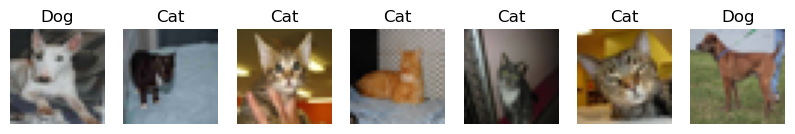

In [34]:
def visualize(X, y):
    
    num_samples = int(input("¿Cuántas imágenes quieres ver? "))
    plt.figure(figsize=(10, 5))
    indices = np.random.choice(len(X), num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[idx])
        plt.title("Dog" if y[idx] == 1 else "Cat")
        plt.axis("off")
        
    plt.show()
    
visualize(X_train, y_train)

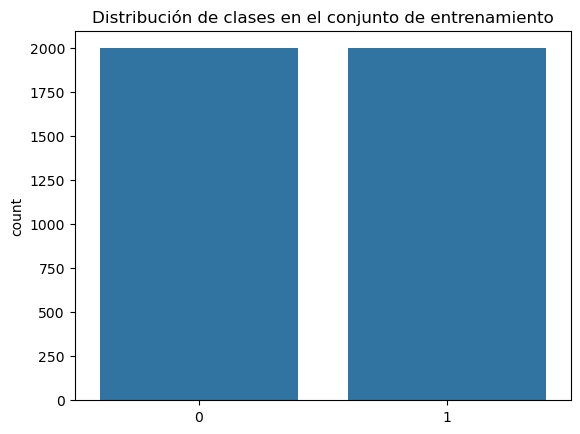

In [35]:
sns.countplot(x=y_train)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.show()

In [45]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5292 - loss: 0.6873 - val_accuracy: 0.6150 - val_loss: 0.6594
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6678 - loss: 0.6157 - val_accuracy: 0.7070 - val_loss: 0.5772
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7086 - loss: 0.5588 - val_accuracy: 0.6920 - val_loss: 0.5867
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7303 - loss: 0.5293 - val_accuracy: 0.7140 - val_loss: 0.5544
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7614 - loss: 0.4893 - val_accuracy: 0.7300 - val_loss: 0.5461
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7814 - loss: 0.4592 - val_accuracy: 0.7670 - val_loss: 0.5042
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7996 - loss: 0.4300 - val_accuracy: 0.7470 - val_loss: 0.5058
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8169 - loss: 0.3958 - val_accuracy: 0.

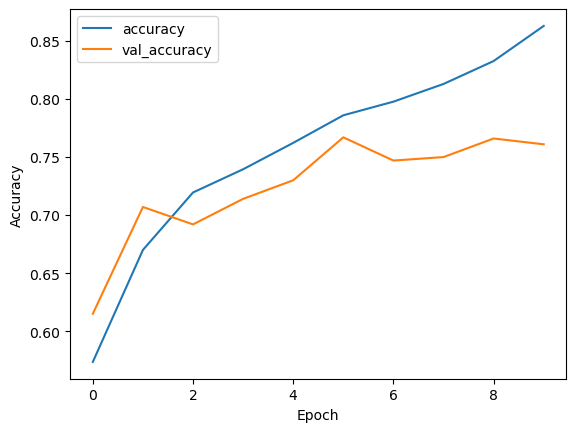

Evaluación del modelo en el conjunto de prueba:
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.5041


[0.5230943560600281, 0.7609999775886536]

In [47]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Evaluación del modelo en el conjunto de prueba:")
model.evaluate(X_test, y_test)

In [48]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8702 - loss: 0.3010 - val_accuracy: 0.7560 - val_loss: 0.5397
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8922 - loss: 0.2593 - val_accuracy: 0.7660 - val_loss: 0.5162
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9087 - loss: 0.2335 - val_accuracy: 0.7620 - val_loss: 0.5599
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9204 - loss: 0.2008 - val_accuracy: 0.7500 - val_loss: 0.6210
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9271 - loss: 0.1934 - val_accuracy: 0.7580 - val_loss: 0.6269
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9456 - loss: 0.1380 - val_accuracy: 0.7540 - val_loss: 0.6313
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9628 - loss: 0.1119 - val_accuracy: 0.7600 - val_loss: 0.7187


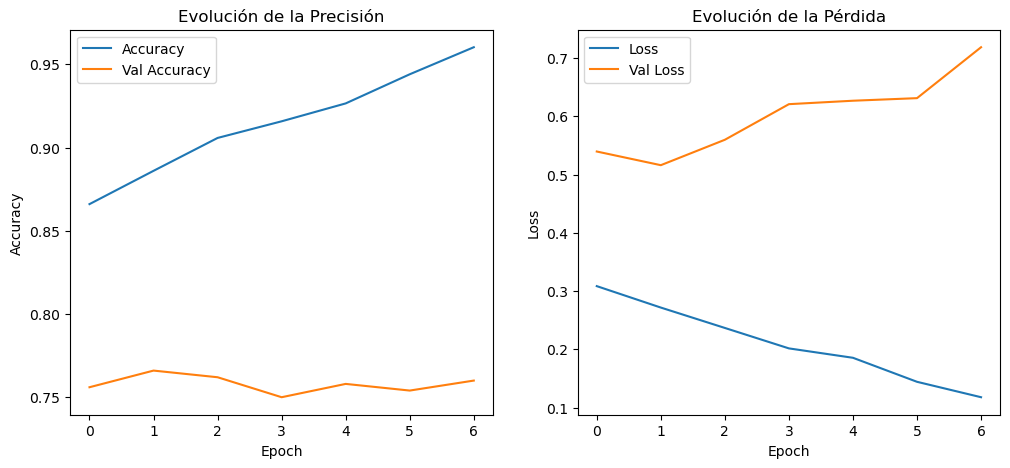

Evaluación del modelo en el conjunto de prueba:
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5648


[0.5162246227264404, 0.765999972820282]

In [49]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Evolución de la Precisión')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida')
plt.show()

print("Evaluación del modelo en el conjunto de prueba:")
model.evaluate(X_test, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

         Cat       0.80      0.71      0.75       500
         Dog       0.74      0.83      0.78       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



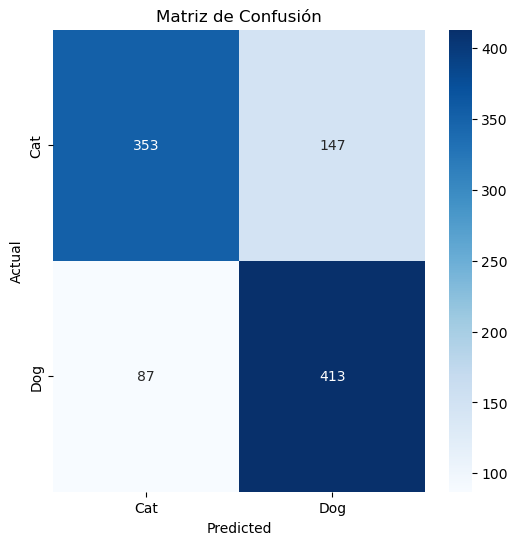

Evaluación del modelo en el conjunto de prueba:
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5648


[0.5162246227264404, 0.765999972820282]

In [53]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

print("Evaluación del modelo en el conjunto de prueba:")
model.evaluate(X_test, y_test)